In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC

In [2]:
training_data = pd.read_csv("../Data/aps_failure_training_set.csv",na_values="na")
training_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Preprocessing

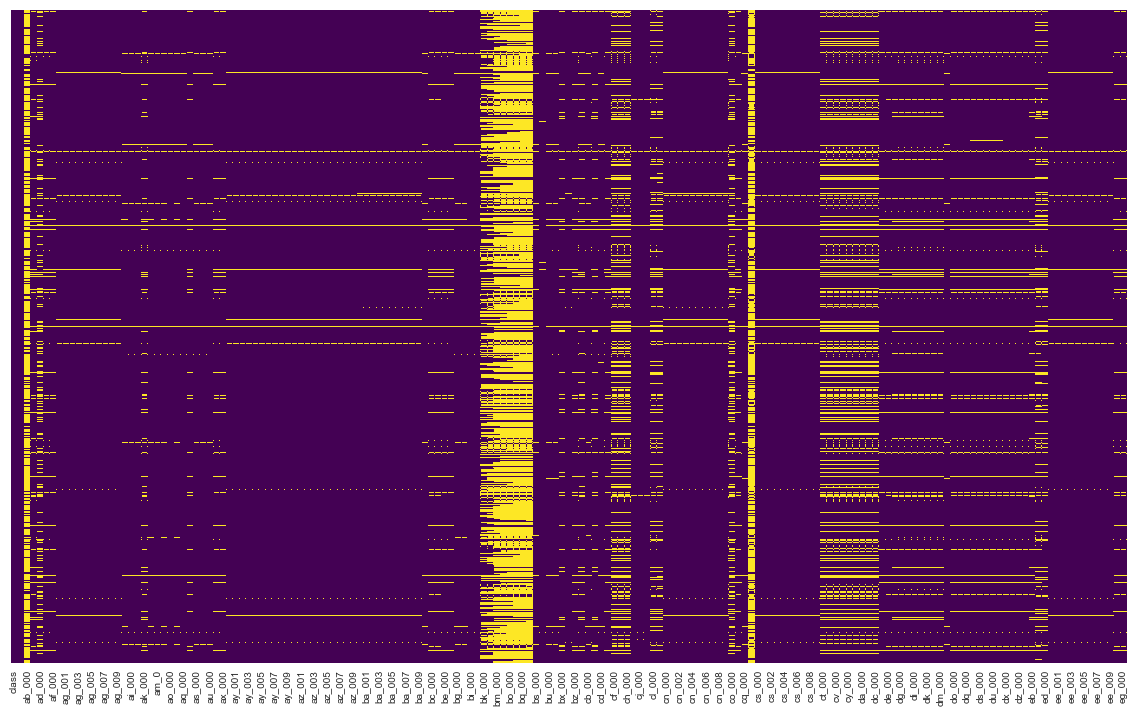

In [3]:
plt.figure(figsize=(20,12))
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

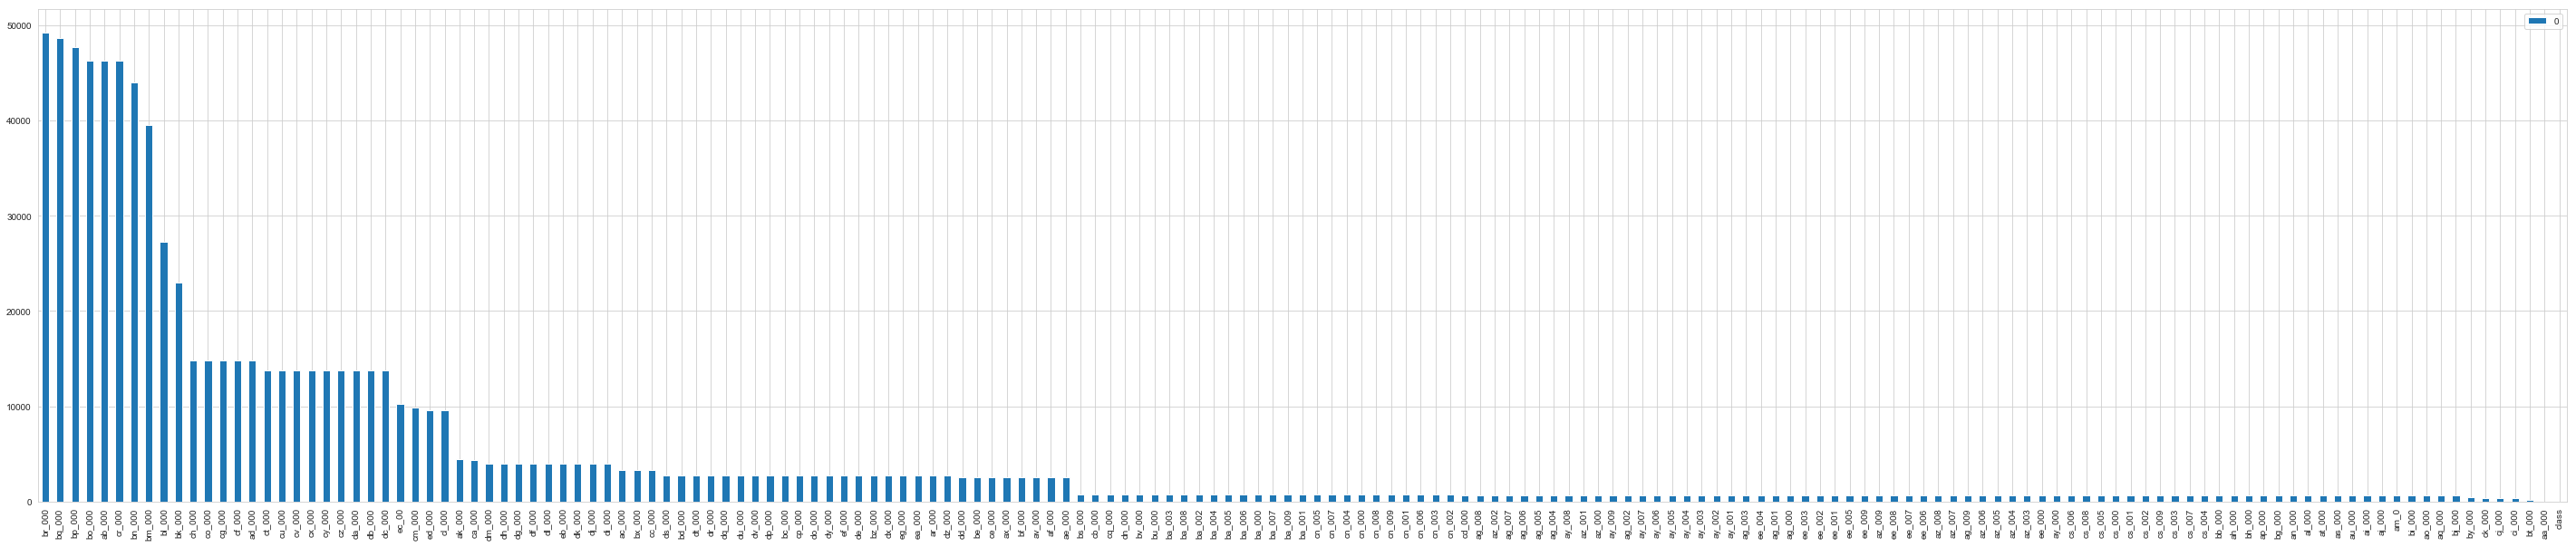

In [4]:
missing = training_data.isna().sum().to_frame().sort_values(by=0, ascending = False)
missing.plot.bar(figsize=(50,10))

# Missing value handling

We are going to use different approches with missing values:

1. Removing the column having 80% missing values (**Self intuition)
2. Keeping all the features
3. Later, we will try to implement some feature engineering 


**For the rest of the missing values, we are replacing them with their mean() for now (**Ref) 

<big><b>Second Approach</b>

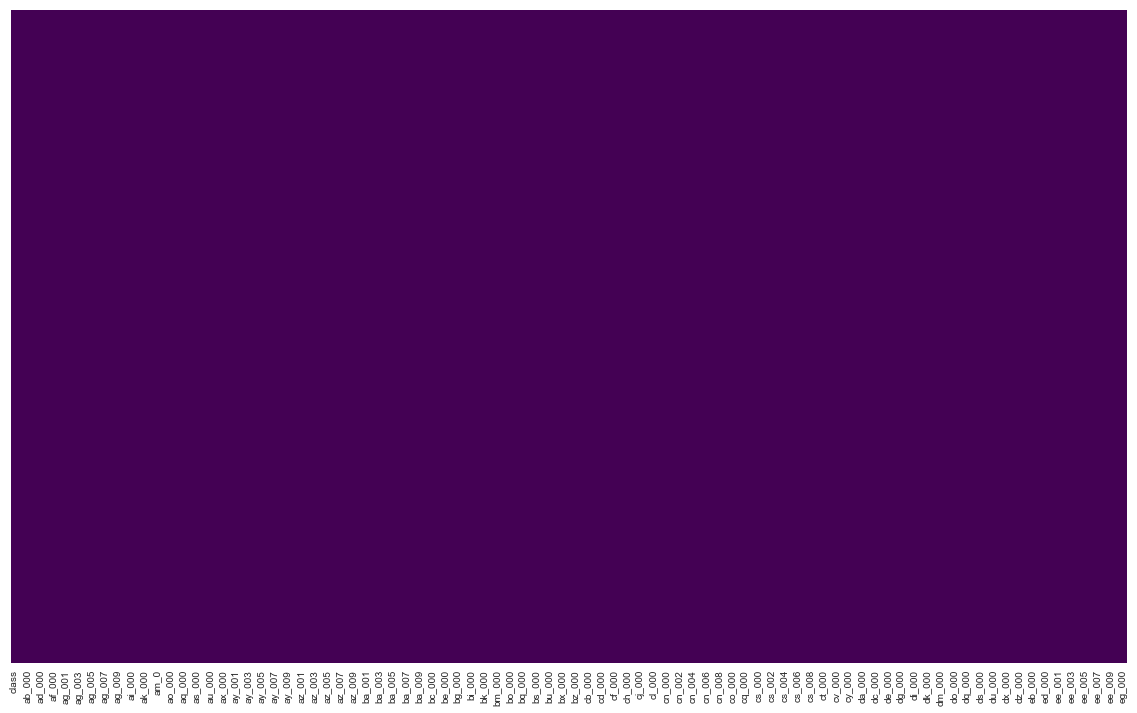

In [5]:
sample_training_data = training_data
sample_training_data.fillna(sample_training_data.mean(),inplace=True)

#after replacing with mean()

plt.figure(figsize=(20,12))
sns.heatmap(sample_training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
#as all the other values are numerical except Class column so we can replace them with 1 and 0

sample_training_data = sample_training_data.replace('neg',0)
sample_training_data = sample_training_data.replace('pos',1)

sample_training_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Testing Data preprocessing

In [7]:
testing_data = pd.read_csv("../Data/aps_failure_test_set.csv",na_values="na")
testing_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


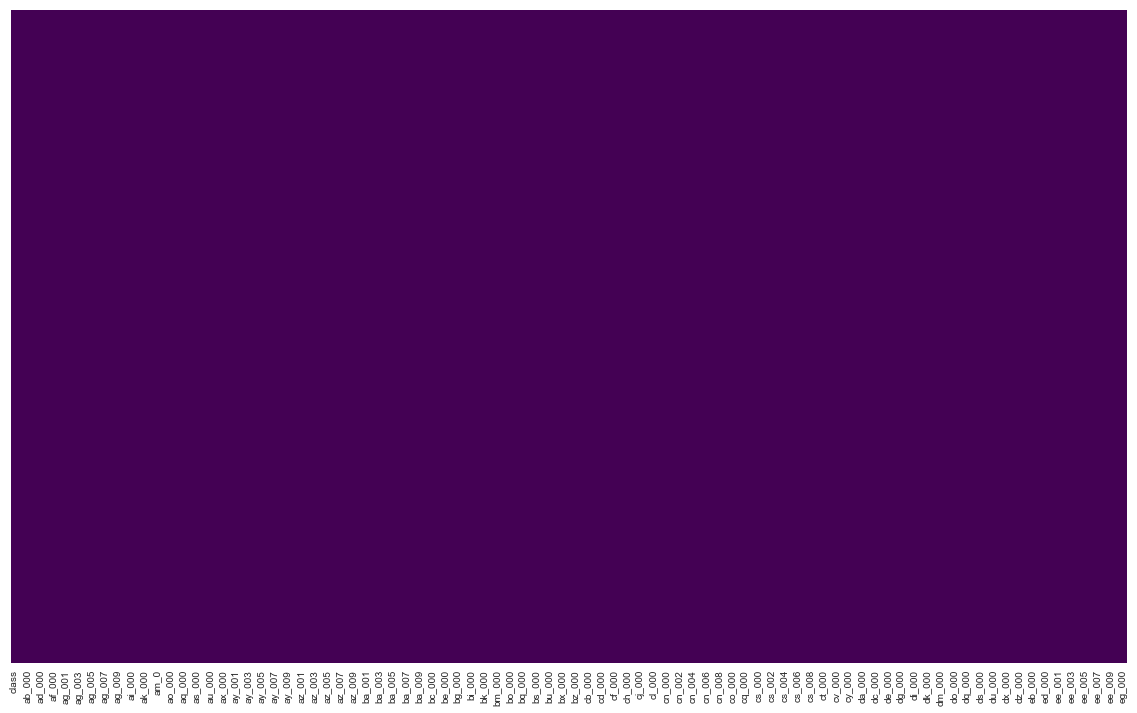

In [8]:
sample_testing_data = testing_data
sample_testing_data.fillna(sample_testing_data.mean(),inplace=True)

#after replacing with mean()

plt.figure(figsize=(20,12))
sns.heatmap(sample_testing_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#as all the other values are numerical except Class column so we can replace them with 1 and 0

sample_testing_data = sample_testing_data.replace('neg',0)
sample_testing_data = sample_testing_data.replace('pos',1)

sample_testing_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.000000,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.000000,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.000000,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,0.772065,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,0.772065,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


# Implemented Methods 

In [10]:
def getCost(y_test,prediction):
    '''
    evaluate the total cost without modified threshold
    '''
    tn, fp, fn, tp = confusion_matrix(y_test,prediction).ravel()
    confusionData = [[tn,fp],[fn,tp]]
    print("Confusion Matrix\n")
    print(pd.DataFrame(confusionData,columns=['FN','FP'],index=['TN','TP']))
    cost = 10*fp+500*fn
    values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
    print("\n\nCost\n")
    print(pd.DataFrame(values))

In [11]:
def getCostWithThreshold(X_test,y_test,prediction,threshold,model):
    """
    evaluate the total cost with modified threshold
    model = model instance
    """
    THRESHOLD = threshold #optimal one chosen from the roc curve
    thresholdPrediction = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1,0)
    tn, fp, fn, tp = confusion_matrix(y_test,thresholdPrediction).ravel()
    cost = 10*fp+500*fn
    values = {'Score':[cost],'Number of Type 1 faults':[fp],'Number of Type 2 faults':[fn]}
    pd.DataFrame(values)

In [12]:
def aucForThreshold(X_test,y_test,model):
    """
    return roc auc curve for determining the optimal threshold
    model = desired model's instance
    """
    from sklearn.metrics import roc_auc_score,roc_curve
    logit_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper center")
    plt.savefig('Log_ROC')


    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='g',linestyle='dashed', color='g',label = 'Threshold')
    ax2.set_ylabel('Threshold',color='g')
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])
    plt.legend(loc="lower right")
    plt.savefig('roc_and_threshold.png')
    plt.show()

In [13]:
def evaluationScored(y_test,prediction):
    acc = metrics.accuracy_score(y_test, prediction)
    r2 = metrics.r2_score(y_test, prediction)
    f1 = metrics.f1_score(y_test, prediction)
    mse = metrics.mean_squared_error(y_test, prediction)
    values = {'Accuracy Score':[acc],'R2':[r2],'F1':[f1],'MSE':[mse]}
    print("\n\nScores")
    print (pd.DataFrame(values))
    

In [14]:
from sklearn.metrics.scorer import make_scorer


def my_scorer(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp+500*fn
    return cost


my_func = make_scorer(my_scorer, greater_is_better=False)

In [15]:
def predictionWithStandardScaling(testingData):
    scalerTesting = StandardScaler()
    scalerTesting.fit(X_test)
    X_test_scaled = scalerTesting.transform(X_test)
    pipePrediction = pipeTesting.predict(X_test_scaled)
    return pipePrediction

# Data Standardization

<b> We are going to implement SVM and that requires Standardiation of Data -- Feature Scaling
</b>

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = sample_training_data.drop('class',axis=1)
y = sample_training_data['class']

In [18]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# PCA AND PARAMETERS OPTIMISATION PIPELINED

In [19]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [20]:
pca = PCA()
svc_model = SVC(probability = False, class_weight="balanced", gamma="auto")

In [21]:
pipe = Pipeline(steps=[("pca",pca),("svc_model",svc_model)])

In [22]:
param_grid = {
    'pca__n_components': range(10,26),
    'svc_model__C': [0.2, 0.3,0.4,0.5],
}

In [23]:
gridModel = GridSearchCV(pipe, param_grid, iid=False, cv=3, return_train_score=False, scoring = my_func, n_jobs=-1, verbose=3)

In [24]:
gridModel.fit(X_scaled, np.ravel(y))

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 25.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc_model', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'pca__n_components': range(10, 26), 'svc_model__C': [0.2, 0.3, 0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=make_scorer(my_scorer, greater_is_better=False), verbose=3)

In [25]:
print("Best parameter (CV score=%0.3f):" % gridModel.best_score_)

Best parameter (CV score=-16443.333):


In [26]:
print(gridModel.best_params_)

{'pca__n_components': 21, 'svc_model__C': 0.3}


In [27]:
X_test = sample_testing_data.drop('class',axis=1)
y_test = sample_testing_data['class']

In [28]:
grid_prediction = gridModel.predict(X_test)

In [29]:
my_scorer(y_test,grid_prediction)

156250

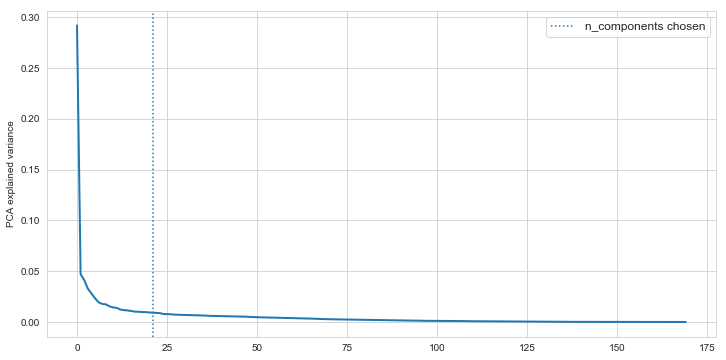

In [30]:
#To find the elbow 

pca.fit(X_scaled)

fig, ax0 = plt.subplots(nrows=1, sharex=True, figsize=(12, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')
ax0.axvline(gridModel.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

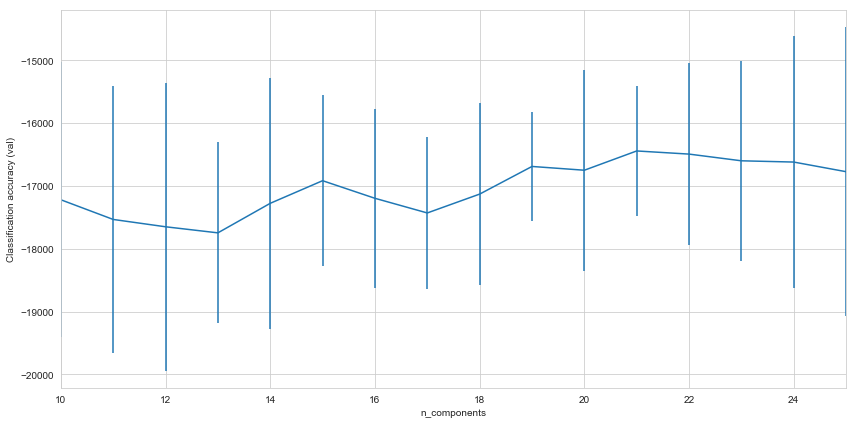

In [31]:
fig, ax1 = plt.subplots(nrows=1, sharex=True, figsize=(12, 6))

results = pd.DataFrame(gridModel.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.tight_layout()
plt.show()

In [32]:
pcaTest = PCA(n_components=24)

In [33]:
svc_model = SVC(probability = False, class_weight="balanced", gamma=0.01,C=0.3)

In [34]:
pipeTesting = Pipeline(steps=[("pcaTest",pcaTest),("svc_model",svc_model)])

In [35]:
pipeTesting.fit(X_scaled, np.ravel(y))

Pipeline(memory=None,
     steps=[('pcaTest', PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc_model', SVC(C=0.3, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [36]:
pipePrediction = pipeTesting.predict(X_test)

In [37]:
getCost(y_test,pipePrediction)

Confusion Matrix

    FN     FP
TN   0  15625
TP   0    375


Cost

    Score  Number of Type 1 faults  Number of Type 2 faults
0  156250                    15625                        0


In [38]:
scalerTesting = StandardScaler()
scalerTesting.fit(X_test)
X_test_scaled = scalerTesting.transform(X_test)

In [39]:
pipePrediction = pipeTesting.predict(X_test_scaled)

In [40]:
getCost(y_test,pipePrediction)

Confusion Matrix

       FN   FP
TN  15194  431
TP     23  352


Cost

   Score  Number of Type 1 faults  Number of Type 2 faults
0  15810                      431                       23
